<a href="https://colab.research.google.com/github/RicStrong/AccidentsDataset/blob/master/CollisionsDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Traffic Collisions#
Because "accident" implies there's nobody to blame.
---
I wanted to recreate the popular "bar chart race" visualization in python. I found a great resource for building one using matplotlib, so this is my attempt at recreating that. Here we go!

I found a dataset on traffic accidents. I may want to do a count of traffic accidents per city (maybe for something more advanced, calculate traffic accidents over the population, not just total count). 


Trying something new: using the Kaggle API to get the dataset in colab rather than downloading and importing. Seems much better now that I've finally go it working. 

Had to give it a few tries with different tutorials, there was difficulty in storing kaggle as a hidden directory and then going from there. Also some API keys seemed to be expired and that threw me off as well. But it's up and running now! 



Big thank you to those responsible for the following resources...

https://towardsdatascience.com/setting-up-kaggle-in-google-colab-ebb281b61463
https://medium.com/@yvettewu.dw/tutorial-kaggle-api-google-colaboratory-1a054a382de0
https://stackoverflow.com/questions/40900195/pandas-cumulative-count
https://stackoverflow.com/questions/50863691/pandas-convert-date-object-to-int
https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html
https://www.linkedin.com/learning/python-data-analysis-2/loading-station-and-temperature-data




In [0]:
!pip install kaggle
!mkdir -p ~/.kaggle

In [0]:
#Get the json file for the API key
from google.colab import files
files.upload()

In [0]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d sobhanmoosavi/us-accidents --force

 95% 188M/199M [00:01<00:00, 123MB/s]
100% 199M/199M [00:01<00:00, 107MB/s]


In [0]:
!unzip \*.zip

Archive:  us-accidents.zip
  inflating: US_Accidents_Dec19.csv  


In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('US_Accidents_Dec19.csv')
df = df[['City', 'State', 'Start_Time', 'Start_Lat', 'Start_Lng']]
df

,City,State,Start_Time,Start_Lat,Start_Lng
0,Dayton,OH,2016-02-08 05:46:00,39.865147,-84.058723
1,Reynoldsburg,OH,2016-02-08 06:07:59,39.928059,-82.831184
2,Williamsburg,OH,2016-02-08 06:49:27,39.063148,-84.032608
3,Dayton,OH,2016-02-08 07:23:34,39.747753,-84.205582
4,Dayton,OH,2016-02-08 07:39:07,39.627781,-84.188354
...,...,...,...,...,...
2974330,Riverside,CA,2019-08-23 18:03:25,34.002480,-117.379360
2974331,San Diego,CA,2019-08-23 19:11:30,32.766960,-117.148060
2974332,Orange,CA,2019-08-23 19:00:21,33.775450,-117.847790
2974333,Culver City,CA,2019-08-23 19:00:21,33.992460,-118.403020


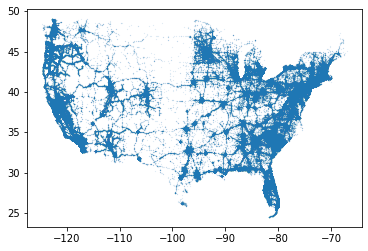

In [0]:
#Much easier to do this type of vizualization than I would have expected!! This is great- just plain plotting 
plt.plot(df['Start_Lng'], df['Start_Lat'], '.', markersize=.1)

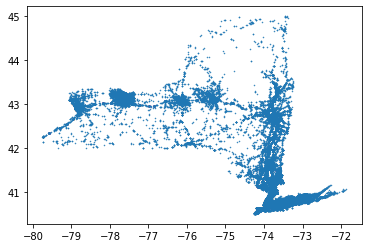

In [0]:
collisions_ca = df[df['State'] == 'NY']
plt.plot(collisions_ca['Start_Lng'], collisions_ca['Start_Lat'], '.', markersize=1)

In [0]:
#Date
#Change Start_Time to a datetime object
#Then change the date time (date) to a string and cut out the "-"
#Next time I'll just take the first few characters
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Date'] = df['Start_Time'].dt.date.astype(str)
#df['Date'] = df['Date'].str.replace("-","").astype(int)

#Location
#Combine city and state, account for common city names- like Springfield or Shelbyville. Drop originals 
df['Location'] = df['City'] + ", " + df['State']
df = df.drop(['City', 'State', 'Start_Time'], axis = 1) 

#drop rows with missing values
df = df.dropna()

#This creates a column to keep a running count of collisions for each location
df['CumCollisionCount'] = df.groupby('Location').cumcount() + 1

df

,Start_Lat,Start_Lng,Date,Location,CumCollisionCount
0,39.865147,-84.058723,2016-02-08,"Dayton, OH",1
1,39.928059,-82.831184,2016-02-08,"Reynoldsburg, OH",1
2,39.063148,-84.032608,2016-02-08,"Williamsburg, OH",1
3,39.747753,-84.205582,2016-02-08,"Dayton, OH",2
4,39.627781,-84.188354,2016-02-08,"Dayton, OH",3
...,...,...,...,...,...
2974330,34.002480,-117.379360,2019-08-23,"Riverside, CA",10249
2974331,32.766960,-117.148060,2019-08-23,"San Diego, CA",21045
2974332,33.775450,-117.847790,2019-08-23,"Orange, CA",3397
2974333,33.992460,-118.403020,2019-08-23,"Culver City, CA",2436


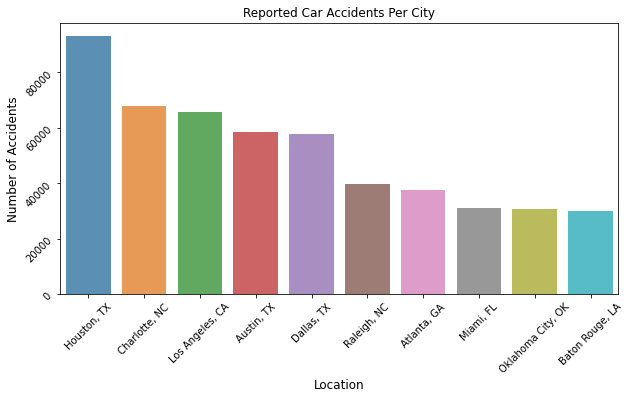

In [0]:
city_count  = df['Location'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8, )
plt.title('Reported Car Accidents Per City')
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.tick_params(rotation=45)
plt.show()

#Is there a way to plot for a range of dates? 

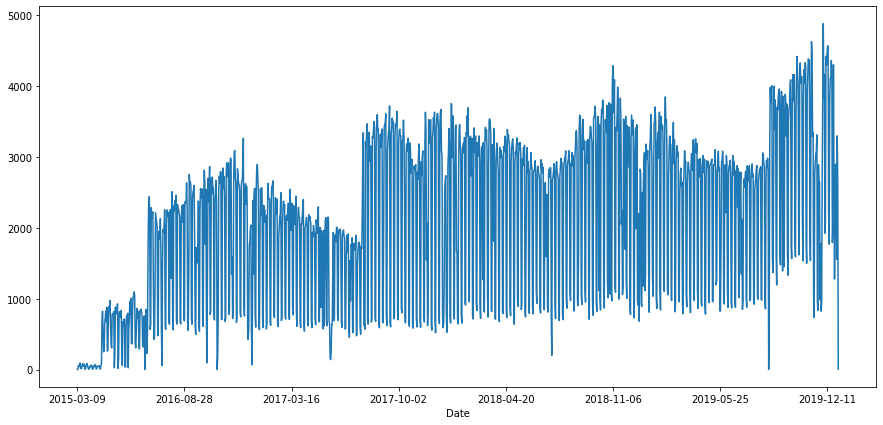

In [0]:
#Let's keep this one- turned out to be a great visualization of accidents over time
#I didn't realize matplotlib could take datetimes as an axis easily, now I know
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Date']).count()['CumCollisionCount'].plot(ax=ax)

In [0]:
# Get the index of max in the CumCollisionCount column after groupby 'Date'
# I really didnt have to sort values first, but nice to do.
def customgroupby(x):
    """
    Return index of first occurrence of maximum.
    Leaving this function here in case you want to do something more complicated later.
    """
    
    return(x['CumCollisionCount'].idxmax())

temp = df.sort_values(by = ['Date']).groupby(['Date']).apply(lambda x: customgroupby(x))

In [0]:
df.loc[temp.values, :]

,Start_Lat,Start_Lng,Date,Location,CumCollisionCount
2771425,41.678690,-83.573370,2015-03-09,"Toledo, OH",1032
2417802,40.630609,-75.470606,2016-01-14,"Whitehall, PA",263
2246272,39.775650,-84.186030,2016-02-08,"Dayton, OH",11106
2246299,39.860250,-85.966230,2016-02-09,"Indianapolis, IN",15588
2246339,39.771280,-84.192300,2016-02-10,"Dayton, OH",11112
...,...,...,...,...,...
2490832,29.726020,-95.333490,2019-12-28,"Houston, TX",86784
2491765,32.816110,-96.868110,2019-12-29,"Dallas, TX",52606
2493145,29.813180,-95.335320,2019-12-30,"Houston, TX",86786
2494324,30.203940,-97.759800,2019-12-31,"Austin, TX",57831


In [0]:
#current_date = '2018-05-20'
#df = (df[df['Date'].le(current_date)].sort_values(by='CumulativeCount', ascending=False))
#df

In [0]:
grouped = df.groupby('Date').sum().reset_index() \
            #.groupby('Location').sum()

df
#grouped.sort_values('Date', ascending=False)

,Start_Lat,Start_Lng,Date,Location,CumCollisionCount
0,39.865147,-84.058723,2016-02-08,"Dayton, OH",1
1,39.928059,-82.831184,2016-02-08,"Reynoldsburg, OH",1
2,39.063148,-84.032608,2016-02-08,"Williamsburg, OH",1
3,39.747753,-84.205582,2016-02-08,"Dayton, OH",2
4,39.627781,-84.188354,2016-02-08,"Dayton, OH",3
...,...,...,...,...,...
2974330,34.002480,-117.379360,2019-08-23,"Riverside, CA",10249
2974331,32.766960,-117.148060,2019-08-23,"San Diego, CA",21045
2974332,33.775450,-117.847790,2019-08-23,"Orange, CA",3397
2974333,33.992460,-118.403020,2019-08-23,"Culver City, CA",2436


In [0]:
df.head(20)

Pretty sure I need to convert to a np array....



Here's where I'm giong to need to take a break. I still want to make the 'barplot race' over the timespan of the dataset, but will need to adjust my method...


For any given day (or range of days), I want to return the cities with the highest counts of accidents -- even if they did not have an accident on that particular day....

"For this day and any day before it, return the top 10 unique cities with highest crash counts"

I'm hoping to do this in matplotlib so I can animate the race like so:

https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41